<a href="https://colab.research.google.com/github/ngoc-thach/AI/blob/main/w4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Đinh Trần Ngọc Thạch
MSSV 20146529
Lớp thứ 5 tiết 1-44

In [2]:
 pip install scikit-fuzzy     

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 15.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=5cf5d5a703f8a11d14834ada4c4486bf00f702c4e6b8675bb6d9ba8cce5f50e5
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


In [5]:
import numpy as np
import skfuzzy as fuzz

x= np.arange(11)
mfx = fuzz.trimf(x,[0,5,10])
print('x=',x)
print('mfx',mfx)

x= [ 0  1  2  3  4  5  6  7  8  9 10]
mfx [0.  0.2 0.4 0.6 0.8 1.  0.8 0.6 0.4 0.2 0. ]


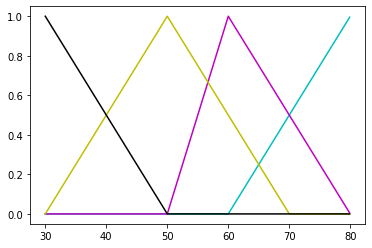

In [10]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

x = np.arange(30,80,0.1)
slow = fuzz.trimf(x,[30,30,50])
mdm=fuzz.trimf(x,[30,50,70])
mdm_ft=fuzz.trimf(x,[50,60,80])
full_sp=fuzz.trimf(x,[60,80,80])
plt.figure()
plt.plot(x,full_sp,'c',linewidth=1.5,label='Full speed')
plt.plot(x,mdm_ft,'m',linewidth=1.5,label='Medium fast')
plt.plot(x,mdm,'y',linewidth=1.5,label='Medium powered')
plt.plot(x,slow,'k',linewidth=1.5,label='Slow')

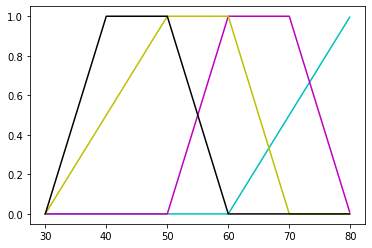

In [13]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

x = np.arange(30,80,0.1)
slow = fuzz.trapmf(x,[30,40,50,60])
mdm=fuzz.trapmf(x,[30,50,60,70])
mdm_ft=fuzz.trapmf(x,[50,60,70,80])
full_sp=fuzz.trapmf(x,[60,80,80,80])
plt.figure()
plt.plot(x,full_sp,'c',linewidth=1.5,label='Full speed')
plt.plot(x,mdm_ft,'m',linewidth=1.5,label='Medium fast')
plt.plot(x,mdm,'y',linewidth=1.5,label='Medium powered')
plt.plot(x,slow,'k',linewidth=1.5,label='Slow')

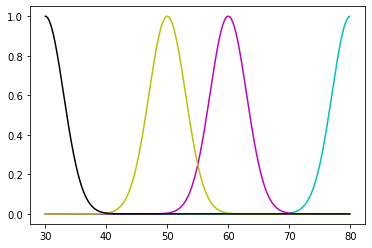

In [16]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

x = np.arange(30,80,0.1)
slow = fuzz.gaussmf(x,30,3)
mdm=fuzz.gaussmf(x,50,3)
mdm_ft=fuzz.gaussmf(x,60,3)
full_sp=fuzz.gaussmf(x,80,3)
plt.figure()
plt.plot(x,full_sp,'c',linewidth=1.5,label='Full speed')
plt.plot(x,mdm_ft,'m',linewidth=1.5,label='Medium fast')
plt.plot(x,mdm,'y',linewidth=1.5,label='Medium powered')
plt.plot(x,slow,'k',linewidth=1.5,label='Slow')

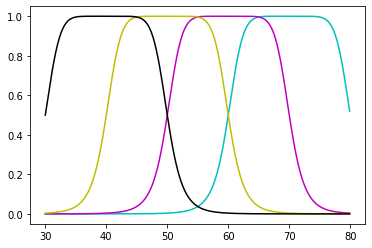

In [17]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

x = np.arange(30,80,0.1)
slow = fuzz.gbellmf(x,10,4,40)
mdm=fuzz.gbellmf(x,10,4,50)
mdm_ft=fuzz.gbellmf(x,10,4,60)
full_sp=fuzz.gbellmf(x,10,4,70)
plt.figure()
plt.plot(x,full_sp,'c',linewidth=1.5,label='Full speed')
plt.plot(x,mdm_ft,'m',linewidth=1.5,label='Medium fast')
plt.plot(x,mdm,'y',linewidth=1.5,label='Medium powered')
plt.plot(x,slow,'k',linewidth=1.5,label='Slow')

25.515706032513773


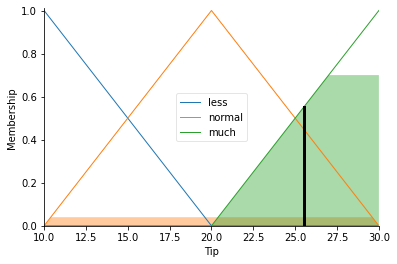

In [35]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

fd=ctrl.Antecedent(np.arange(0,11,1),'Food')
srv=ctrl.Antecedent(np.arange(0,11,1),'Service')
tip=ctrl.Consequent(np.arange(10,31,1),'Tip')

fd['poor']=fuzz.trimf(fd.universe,[0,0,5])
fd['average']=fuzz.trimf(fd.universe,[0,5,10])
fd['good']=fuzz.trimf(fd.universe,[5,10,10])

srv['poor']=fuzz.trimf(srv.universe,[0,0,5])
srv['average']=fuzz.trimf(srv.universe,[0,5,10])
srv['good']=fuzz.trimf(srv.universe,[5,10,10])

tip['less']=fuzz.trimf(tip.universe,[10,10,20])
tip['normal']=fuzz.trimf(tip.universe,[10,20,30])
tip['much']=fuzz.trimf(tip.universe,[20,30,30])

rule1 = ctrl.Rule(fd['poor'] & srv['poor'],tip['less'])
rule2 = ctrl.Rule(fd['poor'] & srv['average'],tip['less'])
rule3 = ctrl.Rule(fd['poor'] & srv['good'],tip['normal'])
rule4 = ctrl.Rule(fd['average'] & srv['poor'],tip['less'])
rule5 = ctrl.Rule(fd['average'] & srv['average'],tip['normal'])
rule6 = ctrl.Rule(fd['average'] & srv['good'],tip['much'])
rule7 = ctrl.Rule(fd['good'] & srv['poor'],tip['normal'])
rule8 = ctrl.Rule(fd['good'] & srv['average'],tip['much'])
rule9 = ctrl.Rule(fd['good'] & srv['good'],tip['much'])

tipping_ctrl= ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['Food']=6.5
tipping.input['Service']=9.8

tipping.compute()
print(tipping.output['Tip'])
tip.view(sim=tipping)

52.33333333333333


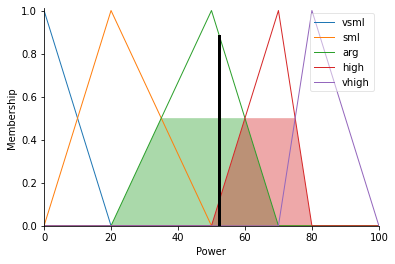

In [42]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

time=ctrl.Antecedent(np.arange(10,181,1),'Time')
rice=ctrl.Antecedent(np.arange(200,12000,100),'Rice')
power=ctrl.Consequent(np.arange(0,101,1),'Power')

time['vft']=fuzz.trimf(time.universe,[10,15,20])
time['ft']=fuzz.trimf(time.universe,[15,20,40])
time['arg']=fuzz.trimf(time.universe,[20,40,80])
time['slow']=fuzz.trimf(time.universe,[40,80,120])
time['vslow']=fuzz.trimf(time.universe,[80,120,180])

rice['vless']=fuzz.trimf(rice.universe,[200,300,400])
rice['less']=fuzz.trimf(rice.universe,[300,400,1000])
rice['arg']=fuzz.trimf(rice.universe,[400,1000,3000])
rice['much']=fuzz.trimf(rice.universe,[1000,3000,6000])
rice['vmuch']=fuzz.trimf(rice.universe,[3000,6000,11000])

power['vsml']=fuzz.trimf(power.universe,[0,0,20])
power['sml']=fuzz.trimf(power.universe,[0,20,50])
power['arg']=fuzz.trimf(power.universe,[20,50,70])
power['high']=fuzz.trimf(power.universe,[50,70,80])
power['vhigh']=fuzz.trimf(power.universe,[70,80,100])

rule1 = ctrl.Rule(time['vft'] & rice['vless'],power['vsml'])
rule2 = ctrl.Rule(time['vft'] & rice['less'],power['sml'])
rule3 = ctrl.Rule(time['vft'] & rice['arg'],power['arg'])
rule4 = ctrl.Rule(time['vft'] & rice['much'],power['high'])
rule5 = ctrl.Rule(time['vft'] & rice['vmuch'],power['vhigh'])

rule6 = ctrl.Rule(time['ft'] & rice['vless'],power['vsml'])
rule7 = ctrl.Rule(time['ft'] & rice['less'],power['sml'])
rule8 = ctrl.Rule(time['ft'] & rice['arg'],power['arg'])
rule9 = ctrl.Rule(time['ft'] & rice['much'],power['high'])
rule10 = ctrl.Rule(time['ft'] & rice['vmuch'],power['vhigh'])

rule11 = ctrl.Rule(time['arg'] & rice['vless'],power['vsml'])
rule12 = ctrl.Rule(time['arg'] & rice['less'],power['sml'])
rule13 = ctrl.Rule(time['arg'] & rice['arg'],power['arg'])
rule14 = ctrl.Rule(time['arg'] & rice['much'],power['high'])
rule15 = ctrl.Rule(time['arg'] & rice['vmuch'],power['vhigh'])

rule16 = ctrl.Rule(time['slow'] & rice['vless'],power['vsml'])
rule17 = ctrl.Rule(time['slow'] & rice['less'],power['sml'])
rule18 = ctrl.Rule(time['slow'] & rice['arg'],power['arg'])
rule19 = ctrl.Rule(time['slow'] & rice['much'],power['high'])
rule20 = ctrl.Rule(time['slow'] & rice['vmuch'],power['vhigh'])

rule21 = ctrl.Rule(time['vslow'] & rice['vless'],power['vsml'])
rule22 = ctrl.Rule(time['vslow'] & rice['less'],power['sml'])
rule23 = ctrl.Rule(time['vslow'] & rice['arg'],power['arg'])
rule24 = ctrl.Rule(time['vslow'] & rice['much'],power['high'])
rule25 = ctrl.Rule(time['vslow'] & rice['vmuch'],power['vhigh'])

powering_ctrl= ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25])
powering = ctrl.ControlSystemSimulation(powering_ctrl)
powering.input['Time']=90
powering.input['Rice']=2000

powering.compute()
print(powering.output['Power'])
power.view(sim=powering)
